# Vectorizers

In this notebook we will create and test several vectorizers.
This will use the Vectorizer class from Subreddit_Predictions_2.piynb
The class documentation will be below.

No training needed
[ 8 10  7 ... 10  2  9]


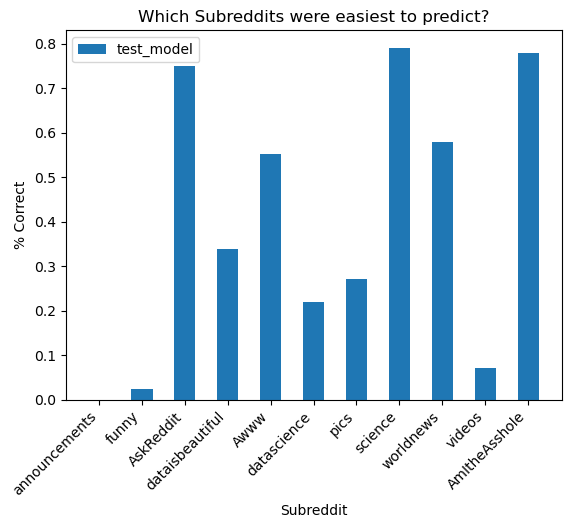

[2 2 2 2 2 2 2]


In [9]:
import pandas as pd
%run Subreddit_Predictions_2.ipynb

# Class: Vectorizer

Objects of this class are vectorizers, like Bag-of-Words or Doc2Vec. They have very few attributes and methods.
All of the attributes and methods will be overwritten by each object of this class.

**Attributes:**

| Name           | Type | Description                                                                                         |
|----------------|------|-----------------------------------------------------------------------------------------------------|
| vectorizerName | str | The name of this vectorizer. <br/> This will be the key for any dictionaries containing it.         |
| description    | str | A breif discription of what this vectorizer is/does. <br/>Put the parameters here if there are any. |
| model | Other | The actual model. Typically an object of a class like Gensim or SCM

**Methods:**

| Name                               | Description                                                                                          |
|------------------------------------|------------------------------------------------------------------------------------------------------|
| train(X_train: DataFrame)          | Uses the training data to train the model.                                                           |
| embed(titles: Series) -> DataFrame | Takes a list/dataFrame of titles and returns a DataFrame of the embeddings for each of them. |



## Vectorizer Testor

Since I will probably be creating several vectorizers, it will help me if I have a function to quickly test them.

### Bag-of-Words

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

def _BoW_train(X_train):

    model = CountVectorizer()
    model.fit_transform(X_train)
    return model

def _BoW_embed(titles, model):
    embedding = model.transform(titles).toarray()
    return pd.DataFrame(embedding, index=titles.index)



In [41]:
model = _BoW_train(obj.X_train)

In [42]:
#_BoW_embed(obj.X_test, model)

In [43]:
test_titles = ['Redditors of Reddit. What is your favorite piece of Reddit history?', 'WIBTA if I stole my younger brothers lunch money?', 'check out this cool video I found', 'asdf', 'cats are dangerous', 'new study shows cats are dangerous', 'reddit cool aita']
test_titles = pd.DataFrame({'title':test_titles})
test_titles=test_titles['title']
#test_titles

In [44]:
#_BoW_embed(test_titles, model)

In [45]:
BoW = Vectorizer('BoW')
BoW.description = "Naive Bag-of-Words embedding"

BoW._train = _BoW_train
BoW._embed = _BoW_embed

obj.add_vectorizer(BoW)
obj.add_feature_vectors('BoW')

### Testing

In [76]:
def test_vectorizer(vectorizer):
    """This tests to see if this is a proper trained vectorizer"""
    if type(vectorizer) != Vectorizer: print('Object is wrong type')
    elif not hasattr(vectorizer, 'model'): print('Vectorizer has not been trained yet')

    else:
        test_titles = ['Redditors of Reddit. What is your favorite piece of Reddit history?', 'WIBTA if I stole my younger brothers lunch money?', 'check out this cool video I found', 'asdf', 'cats are dangerous', 'new study shows cats are dangerous', 'reddit cool aita']
        test_titles = pd.DataFrame({'title':test_titles})
        test_titles=test_titles['title']

        try:
            embeddings = vectorizer.embed(test_titles)
            if type(embeddings) != pd.core.frame.DataFrame: print('output is not a DataFrame. Instead it is', str(type(embeddings)))

            else: print('Good to go!')

        except TypeError:
            print('Vectorizer does not accept Series as inputs, as it should')

In [77]:
test_vectorizer(BoW)

Good to go!


In [69]:
type(BoW._embed(test_titles,model))

pandas.core.frame.DataFrame

In [79]:
type(obj.Y_train)

numpy.ndarray

In [82]:
from sklearn.decomposition import PCA

# Initialize the PCA object with the number of components to retain
pca = PCA(n_components=2)

# Fit the PCA model to the data
X_train_vectors = BoW._embed(obj.X_train,model)
pca.fit(X_train_vectors)

# Transform the data to the first two principal components
X_train_pca = pca.transform(X_train_vectors)

# Print the explained variance ratio of the first two components
print(pca.explained_variance_ratio_)


[0.05728889 0.03167378]


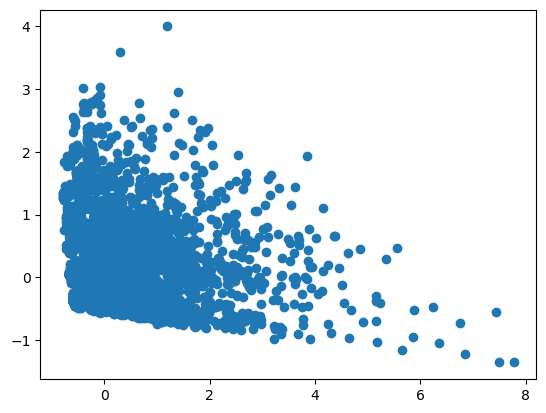

In [83]:
import matplotlib.pyplot as plt
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1])
plt.show()


In [84]:
X_train_reconstructed = pca.inverse_transform(X_train_pca)


In [86]:
import numpy as np
pca_components = pca.components_
explained_variance = np.var(X_train_pca, axis=0)
explained_variance_ratio = explained_variance / np.sum(explained_variance)


In [87]:
explained_variance_ratio


array([0.64396549, 0.35603451])

In [88]:
from sklearn.decomposition import PCA

# Initialize the PCA object with the desired level of explained variance
pca = PCA(n_components=0.95)

# Fit the PCA model to the data
pca.fit(X_train_vectors)

# Number of components that explain the desired level of variance
n_components = pca.n_components_

# Transform the data to the principal components that explain the desired level of variance
X_train_pca = pca.transform(X_train_vectors)

# The features that are considered noise are the ones that are not included in the
# transformed data
noise_features = X_train_vectors.columns[n_components:]

# The data without the noise features
X_train_noise_free = X_train_vectors.drop(noise_features, axis=1)


In [89]:
X_train_noise_free

,0,1,2,3,4,5,6,7,8,9,...,3527,3528,3529,3530,3531,3532,3533,3534,3535,3536
id,,,,,,,,,,,,,,,,,,,,,
108fbq9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zsy6yt,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zyzra4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zuxugl,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
103xop7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10d3l7p,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10emof1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10e159l,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [90]:
X_train_vectors

,0,1,2,3,4,5,6,7,8,9,...,14559,14560,14561,14562,14563,14564,14565,14566,14567,14568
id,,,,,,,,,,,,,,,,,,,,,
108fbq9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zsy6yt,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zyzra4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zuxugl,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
103xop7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10d3l7p,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10emof1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10e159l,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Feature Analysis

Which words are actually useful?

In [92]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier

# Initialize the RandomForestClassifier
clf = RandomForestClassifier()

# Fit the classifier to the data
clf.fit(X_train_vectors, obj.Y_train)

# Get feature importances
importances = clf.feature_importances_

# Get the index of the top 100 features
top_100 = np.argsort(importances)[::-1][:100]

# Get the feature names of the top 100 features
top_100_words = X_train_vectors.columns[top_100]


In [96]:
feature_names = model.get_feature_names()
word_list = [feature_names[i] for i in top_100_words]

In [97]:
word_list

['aita',
 'oc',
 'what',
 'for',
 'my',
 'data',
 'you',
 'to',
 'whats',
 'of',
 'study',
 'in',
 'the',
 'ukraine',
 'and',
 'science',
 'your',
 'wibta',
 'not',
 'is',
 'this',
 '2022',
 'do',
 'that',
 'how',
 'reddit',
 'on',
 'with',
 'cat',
 'by',
 'russian',
 'baby',
 'are',
 'russia',
 'as',
 'wanting',
 'at',
 'iran',
 'if',
 'new',
 'us',
 'says',
 'from',
 'job',
 'friend',
 'telling',
 'her',
 'sunset',
 'would',
 'cute',
 'me',
 '2023',
 'ds',
 'it',
 'or',
 'have',
 'dog',
 'china',
 'best',
 'most',
 'world',
 'scientist',
 'more',
 'learning',
 'he',
 'little',
 'was',
 'why',
 'out',
 'advice',
 'over',
 'associated',
 'his',
 'an',
 'about',
 'be',
 'researchers',
 'who',
 'can',
 'just',
 'like',
 'finds',
 'map',
 'thing',
 'one',
 'vs',
 'she',
 'when',
 'took',
 'friends',
 'so',
 'otter',
 'people',
 'may',
 'got',
 'time',
 'video',
 'its',
 'year',
 'years']

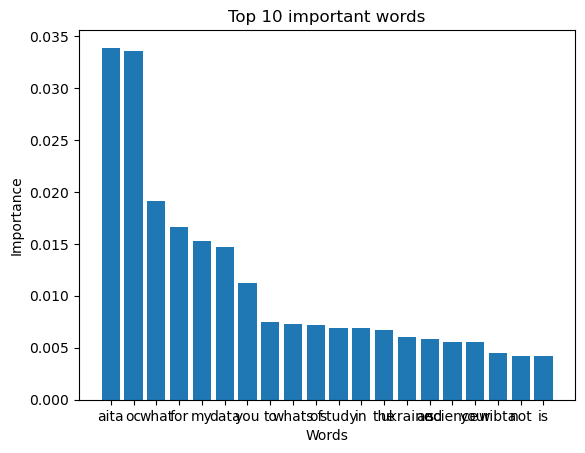

In [101]:
import matplotlib.pyplot as plt

# Get the top 10 words and their importances
top_10_words = word_list[:20]
top_10_importances = importances[top_100][:20]

# Create a bar chart
plt.bar(top_10_words, top_10_importances)

# Add labels and title
plt.xlabel("Words")
plt.ylabel("Importance")
plt.title("Top 10 important words")

# Show the graph
plt.show()

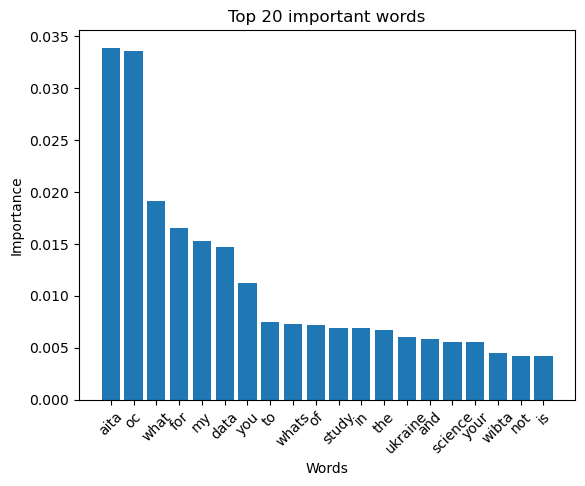

In [105]:
import matplotlib.pyplot as plt

# Get the top N words and their importances
num_words = 20
top_N_words = word_list[:num_words]
top_N_importances = importances[top_100][:num_words]

# Create a bar chart
plt.bar(top_N_words, top_N_importances)

# Add labels and title
plt.xlabel("Words")
plt.ylabel("Importance")
plt.title(f"Top {num_words} important words")

# Rotate the x-axis labels
plt.xticks(rotation=45)

# Show the graph
plt.show()


In [107]:
from sklearn.svm import LinearSVC

# Initialize the LinearSVC
clf = LinearSVC(C=0.1, penalty="l1", dual=False)

# Fit the classifier to the data
clf.fit(X_train_vectors, obj.Y_train)

# Get feature importances
importances = np.abs(clf.coef_)

# Get the index of the top N features
top_N = np.argsort(importances)[::-1][:num_words]

# Get the feature names of the top N features
top_N_words = X_train_vectors.columns[top_N]

# Create a bar chart
plt.bar(top_N_words, importances[top_N])

# Add labels and title
plt.xlabel("Words")
plt.ylabel("Importance")
plt.title(f"Top {num_words} important words")

# Rotate the x-axis labels
plt.xticks(rotation=45)

# Show the graph
plt.show()


C:\Users\raino\AppData\Local\Temp\ipykernel_21448\1802584050.py:16: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  top_N_words = X_train_vectors.columns[top_N]


IndexError: index 9673 is out of bounds for axis 0 with size 11